In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_membrane_circuit(C, R):
    # input current
    I = 10 # nA

    # capacitance and leak resistance
    # C = 0.01 # nF
    # R = 100 # M ohms
    tau = R*C # = 0.1*100 nF-Mohms = 100*100 pF Mohms = 10 ms

    print('C = %.3f nF' % C)
    print('R = %.3f M ohms' % R)
    print('tau = %.3f ms' % tau)
    print('(Theoretical)')

    # membrane potential equation dV/dt = - V/RC + I/C
    tstop = 150 # ms

    V_inf = I*R # peak V (in mV)
    tau = 0 # experimental (ms)

    h = 0.2 # ms (step size)

    V = 0 # mV
    V_trace = [V] # mV

    for t in np.arange(h, tstop, h):

        # Euler method: V(t+h) = V(t) + h*dV/dt
        V = V +h*(- (V/(R*C)) + (I/C))

        # Verify membrane time constant
        if (not tau and (V > 0.6321*V_inf)):
            tau = t
            print('tau = %.3f ms' % tau)
            print('(Experimental)')

        
        # Stop current injection 
        if t >= 0.6*tstop:
            I = 0

        V_trace += [V]
        if t % 10 == 0:
            plt.plot(np.arange(0,t+h, h), V_trace, color='r')
            plt.xlim(0, tstop)
            plt.ylim(0, V_inf)
            plt.draw()
        
    plt.show()

C = 0.100 nF
R = 100.000 M ohms
tau = 10.000 ms
(Theoretical)
tau = 10.000 ms
(Experimental)


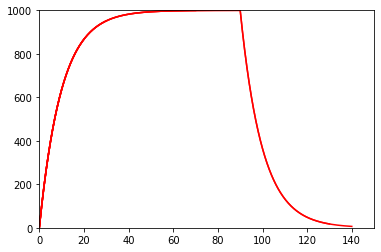

In [13]:
plot_membrane_circuit(0.1, 100)

C = 0.100 nF
R = 500.000 M ohms
tau = 50.000 ms
(Theoretical)
tau = 50.000 ms
(Experimental)


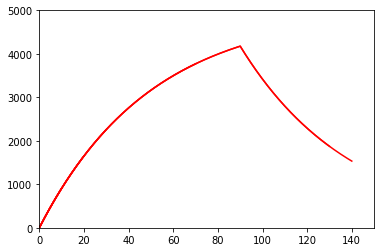

In [14]:
plot_membrane_circuit(0.1, 500)

C = 0.010 nF
R = 100.000 M ohms
tau = 1.000 ms
(Theoretical)
tau = 1.000 ms
(Experimental)


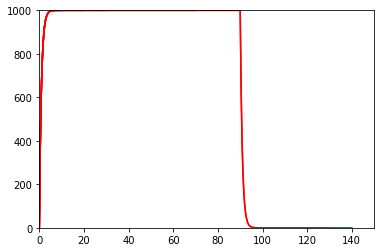

In [15]:
plot_membrane_circuit(0.01, 100)

C = 0.010 nF
R = 1000.000 M ohms
tau = 10.000 ms
(Theoretical)
tau = 10.000 ms
(Experimental)


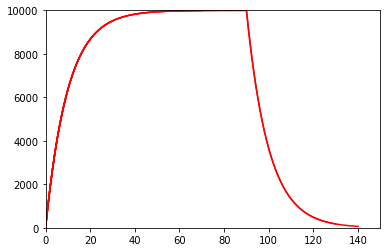

In [16]:
plot_membrane_circuit(0.01, 1000)

In [46]:
def spike_plot(I):
    # input current
    # I = 1 # nA

    # capacitance and leak resistance
    C = 1 # nF
    R = 40 # M ohms

    # I & F implementation dV/dt = - V/RC + I/C
    # Using h = 1 ms step size, Euler method

    V = 0
    tstop = 200
    abs_ref = 5 # absolute refractory period 
    ref = 0 # absolute refractory period counter
    V_trace = []  # voltage trace for plotting
    V_th = 10 # spike threshold

    for t in range(tstop):
    
        if not ref:
            V = V - (V/(R*C)) + (I/C)
        else:
            ref -= 1
            V = 0.2 * V_th # reset voltage
        
        if V > V_th:
            V = 50 # emit spike
            ref = abs_ref # set refractory counter

        V_trace += [V]


    plt.plot(V_trace)
    plt.show()
    return V_trace

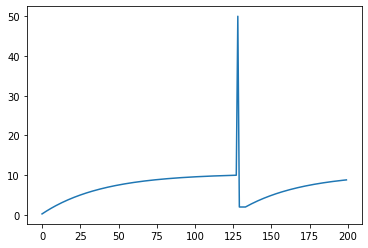

In [49]:
spike_plot(0.26);

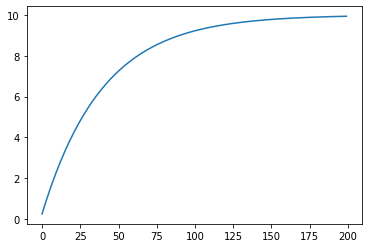

In [50]:
spike_plot(0.25);

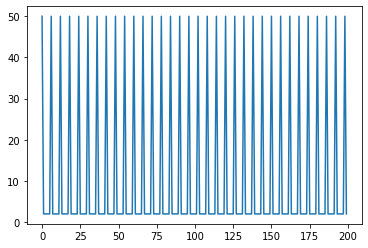

34

In [55]:
np.sum(np.array(spike_plot(100)) > 20)

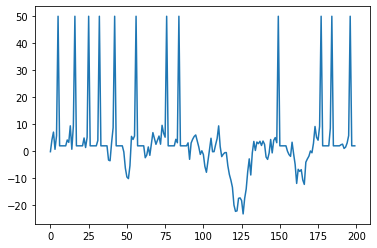

In [61]:
# input current
I = 1 # nA

# capacitance and leak resistance
C = 1 # nF
R = 40 # M ohms

# I & F implementation dV/dt = - V/RC + I/C
# Using h = 1 ms step size, Euler method

V = 0
tstop = 200
abs_ref = 5 # absolute refractory period 
ref = 0 # absolute refractory period counter
V_trace = []  # voltage trace for plotting
V_th = 10 # spike threshold
spiketimes = [] # list of spike times

# input current
noiseamp = 5 # amplitude of added noise
I += noiseamp*np.random.normal(0, 1, (tstop,)) # nA; Gaussian noise

for t in range(tstop):
  
   if not ref:
       V = V - (V/(R*C)) + (I[t]/C)
   else:
       ref -= 1
       V = 0.2 * V_th # reset voltage
   
   if V > V_th:
       V = 50 # emit spike
       ref = abs_ref # set refractory counter

   V_trace += [V]


plt.plot(V_trace)
plt.show()